# Proyek Klasifikasi Gambar: [Vegetable Image Dataset]
- **Nama:** [Pangeran Silaen]
- **Email:** [mc114d5y1975@student.devacademy.id]
- **ID Dicoding:** [MC114D5Y1975]

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install opendatasets
import zipfile, os
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
import seaborn as sns
import tensorflow as tf


from sklearn.model_selection import train_test_split  # Untuk membagi dataset
from sklearn.metrics import confusion_matrix
from keras.layers import TFSMLayer
from keras import Sequential
from tensorflow.keras.preprocessing import image
from keras.models import Sequential
from keras.regularizers import l2
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
!pip install tensorflowjs


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


## Data Preparation

In [ ]:
od.download(
    'https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset'
)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  pangeransilaen


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset


In [ ]:
base_dir = 'vegetable-image-dataset/Vegetable Images/vegetable'
os.listdir(base_dir)


['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

## Data Loading

In [ ]:
# Path ke folder yang sudah digabung
base_path = 'vegetable-image-dataset/Vegetable Images/vegetable'


In [ ]:
# Menghitung jumlah total gambar di dalam folder dan subfolder
total_images = 0

# Mengambil semua kategori/kelas di dalam base_path
classes = os.listdir(base_path)

# Iterasi untuk menghitung jumlah gambar di setiap kelas
for cls in classes:
    cls_path = os.path.join(base_path, cls)
    if os.path.isdir(cls_path):  # Mengecek apakah path tersebut adalah direktori
        image_count = len(os.listdir(cls_path))  # Menghitung jumlah gambar di dalam kelas
        total_images += image_count  # Menambahkan jumlah gambar ke total_images
        print(f"📷 Kelas '{cls}' memiliki {image_count} gambar.")

print(f"\nTotal jumlah gambar di seluruh folder: {total_images}")

📷 Kelas 'Bean' memiliki 1400 gambar.
📷 Kelas 'Bitter_Gourd' memiliki 1400 gambar.
📷 Kelas 'Bottle_Gourd' memiliki 1400 gambar.
📷 Kelas 'Brinjal' memiliki 1400 gambar.
📷 Kelas 'Broccoli' memiliki 1400 gambar.
📷 Kelas 'Cabbage' memiliki 1400 gambar.
📷 Kelas 'Capsicum' memiliki 1400 gambar.
📷 Kelas 'Carrot' memiliki 1400 gambar.
📷 Kelas 'Cauliflower' memiliki 1400 gambar.
📷 Kelas 'Cucumber' memiliki 1400 gambar.
📷 Kelas 'Papaya' memiliki 1400 gambar.
📷 Kelas 'Potato' memiliki 1400 gambar.
📷 Kelas 'Pumpkin' memiliki 1400 gambar.
📷 Kelas 'Radish' memiliki 1400 gambar.
📷 Kelas 'Tomato' memiliki 1400 gambar.

Total jumlah gambar di seluruh folder: 21000


In [ ]:
# Path tujuan untuk folder train, validation, dan test
data_dir = 'vegetable-image-dataset/Vegetable Images/data'

In [ ]:
# Buat folder train, validation, dan test jika belum ada
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'validation')
test_dir = os.path.join(data_dir, 'test')


In [ ]:
# Membuat folder jika belum ada
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

## Data Preprocessing

### Split Dataset  Menjadi Train, Validation, dan Test

In [ ]:
# Tentukan proporsi untuk pembagian dataset
train_size = 0.80  # 80% untuk training
val_size = 0.10    # 10% untuk validation
test_size = 0.10   # 10% untuk testing


In [ ]:
# Mengambil nama-nama kelas (subfolder) dalam folder vegetable
categories = os.listdir(base_path)


In [ ]:
# Memulai pembagian dataset
for category in categories:
    # Path ke folder kelas
    category_path = os.path.join(base_path, category)

    # Ambil daftar gambar dalam kelas ini
    all_images = os.listdir(category_path)

    # Split data gambar untuk training dan sisa (val + test)
    train_images, temp_images = train_test_split(all_images, train_size=train_size, random_state=42)

    # Split sisa data menjadi validation dan test
    val_images, test_images = train_test_split(temp_images, train_size=val_size / (val_size + test_size), random_state=42)

    # Buat subfolder untuk kelas di train, validation, dan test
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

    # Pindahkan gambar ke folder train
    for image in train_images:
        source_image = os.path.join(category_path, image)
        dest_image = os.path.join(train_dir, category, image)
        if os.path.exists(source_image) and not os.path.exists(dest_image):
            shutil.move(source_image, dest_image)

    # Pindahkan gambar ke folder validation
    for image in val_images:
        source_image = os.path.join(category_path, image)
        dest_image = os.path.join(val_dir, category, image)
        if os.path.exists(source_image) and not os.path.exists(dest_image):
            shutil.move(source_image, dest_image)

    # Pindahkan gambar ke folder test
    for image in test_images:
        source_image = os.path.join(category_path, image)
        dest_image = os.path.join(test_dir, category, image)
        if os.path.exists(source_image) and not os.path.exists(dest_image):
            shutil.move(source_image, dest_image)

print("✅ Pembagian dataset selesai!")

✅ Pembagian dataset selesai!


## PREPROCESSING & AUGMENTASI DATA

In [ ]:
train_dir = "vegetable-image-dataset/Vegetable Images/data/train"
val_dir = "vegetable-image-dataset/Vegetable Images/data/validation"
test_dir = "vegetable-image-dataset/Vegetable Images/data/test"

# Augmentasi hanya untuk training set
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalisasi data untuk skala 0-1
    horizontal_flip=True         # Hanya melakukan flip horizontal untuk variasi sederhana
)


# Validasi dan Test hanya perlu normalisasi (tanpa augmentasi)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load dataset ke dalam generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode="categorical"
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode="categorical",
    shuffle=False
)

Found 16800 images belonging to 15 classes.
Found 2100 images belonging to 15 classes.
Found 2100 images belonging to 15 classes.


## Modelling

## MENGGUNAKAN MODEL CNN

In [ ]:
tf.random.set_seed(42)

model_1 = Sequential()

model_1.add(
    Conv2D(filters=20, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 3))
)
model_1.add(Conv2D(20, (3, 3), activation="relu"))
model_1.add(MaxPooling2D((2, 2), padding="valid"))

model_1.add(Conv2D(50, (3, 3), activation="relu"))
model_1.add(Conv2D(50, (3, 3), activation="relu"))
model_1.add(MaxPooling2D((2, 2)))

model_1.add(Flatten())
model_1.add(Dense(15, activation="softmax"))  # number of neurons have to match number of class

# Compile the model
model_1.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"],
)
model_1.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)                   │ (None, 222, 222, 20)        │             560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 220, 220, 20)        │           3,620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 110, 110, 20)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 108, 108, 50)        │           9,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 106, 106, 50)        │          22,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 53, 53, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 140450)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 15)                  │       2,106,765 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,142,545 (8.17 MB)

 Trainable params: 2,142,545 (8.17 MB)

 Non-trainable params: 0 (0.00 B)

## CallBacks

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        acc = logs.get('accuracy')
        val_acc = logs.get('val_accuracy')
        if acc is not None and val_acc is not None:
            if acc >= 0.95 and val_acc >= 0.95:
                print(f"\n🎉 Training dihentikan karena akurasi training ({acc:.2f}) dan val ({val_acc:.2f}) >= 95%")
                self.model.stop_training = True

callback_95 = myCallback()

In [ ]:
# Melatih model
history_1 = model_1.fit(
    train_generator,  # Generator untuk data pelatihan
    epochs=10,        # Jumlah epochs (sesuaikan sesuai kebutuhan)
    validation_data=val_generator,  # Menggunakan validasi data generator
    callbacks=[callback_95]  # Menambahkan callback untuk menghentikan pelatihan lebih awal jika diperlukan
)

Epoch 1/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 780s 3s/step - accuracy: 0.4790 - loss: 1.5673 - val_accuracy: 0.8019 - val_loss: 0.5996
Epoch 2/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 702s 3s/step - accuracy: 0.8713 - loss: 0.4133 - val_accuracy: 0.8848 - val_loss: 0.3451
Epoch 3/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 688s 3s/step - accuracy: 0.9317 - loss: 0.2246 - val_accuracy: 0.9271 - val_loss: 0.2416
Epoch 4/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 681s 3s/step - accuracy: 0.9551 - loss: 0.1452 - val_accuracy: 0.9124 - val_loss: 0.3094
Epoch 5/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 681s 3s/step - accuracy: 0.9601 - loss: 0.1338 - val_accuracy: 0.9348 - val_loss: 0.2219
Epoch 6/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 684s 3s/step - accuracy: 0.9772 - loss: 0.0764 - val_accuracy: 0.9329 - val_loss: 0.2570
Epoch 7/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 634s 2s/step - accuracy: 0.9788 - loss: 0.0749 - val_accuracy: 0.9000 - val_loss: 0.4225
Epoch 8/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 534s 2s/step - accuracy: 0.9822 - loss: 0.0629 - val_accu

In [ ]:
# Simpan model dalam format .keras
model_1.save("model_1.keras")
print("✅ Model berhasil disimpan dalam format .keras.")

✅ Model berhasil disimpan dalam format .keras.


## Evaluasi dan Visualisasi

In [ ]:
# 1️⃣ Evaluasi model_1 pada test set
test_loss, test_acc = model_1.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")
print(f"📉 Test Loss: {test_loss:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.9437 - loss: 0.1986

✅ Test Accuracy: 93.67%
📉 Test Loss: 0.2113


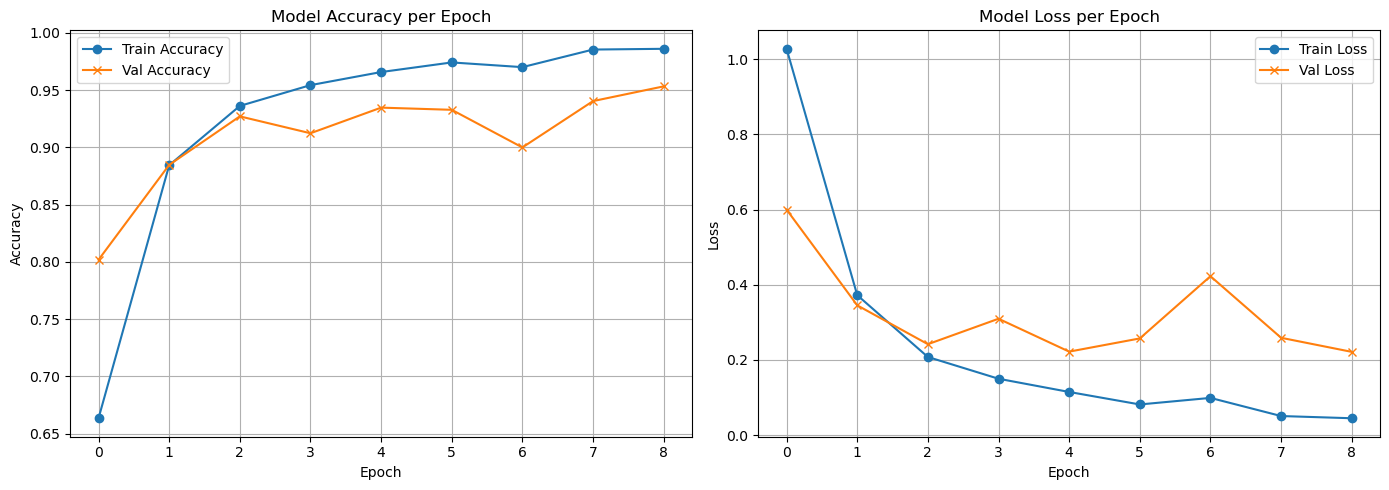

In [ ]:
# 📊 2. Visualisasi Akurasi dan Loss Selama Training
def plot_history(history):
    plt.figure(figsize=(14, 5))

    # Plot akurasi
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy", marker='o')
    plt.plot(history.history["val_accuracy"], label="Val Accuracy", marker='x')
    plt.title("Model Accuracy per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss", marker='o')
    plt.plot(history.history["val_loss"], label="Val Loss", marker='x')
    plt.title("Model Loss per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Panggil fungsi visualisasi dengan history_1
plot_history(history_1)


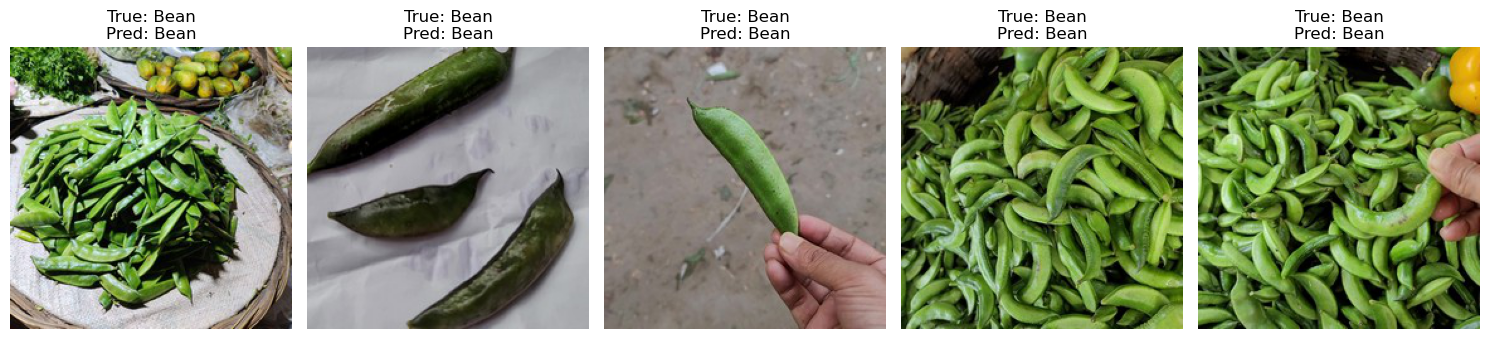

In [ ]:
def display_random_predictions(generator, model, class_names, num_images=5):
    # Ambil batch
    generator.reset()
    x_batch, y_batch = next(generator)

    # Pilih index gambar secara acak dari batch
    indices = np.random.choice(range(len(x_batch)), num_images, replace=False)

    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(indices):
        img = x_batch[idx]
        true_label = np.argmax(y_batch[idx])
        prediction = model.predict(np.expand_dims(img, axis=0), verbose=0)
        predicted_label = np.argmax(prediction)

        plt.subplot(1, num_images, i+1)
        plt.imshow(img)  # Tidak perlu ubah ke uint8 jika sudah dalam [0,1]
        plt.axis('off')
        plt.title(f"True: {class_names[true_label]}\nPred: {class_names[predicted_label]}")

    plt.tight_layout()
    plt.show()

# Daftar nama kelas
class_names = list(train_generator.class_indices.keys())  # atau bisa didefinisikan manual

# Panggil fungsi untuk menampilkan 5 gambar acak dari test set
display_random_predictions(test_generator, model_1, class_names, num_images=5)


33/33 ━━━━━━━━━━━━━━━━━━━━ 28s 820ms/step


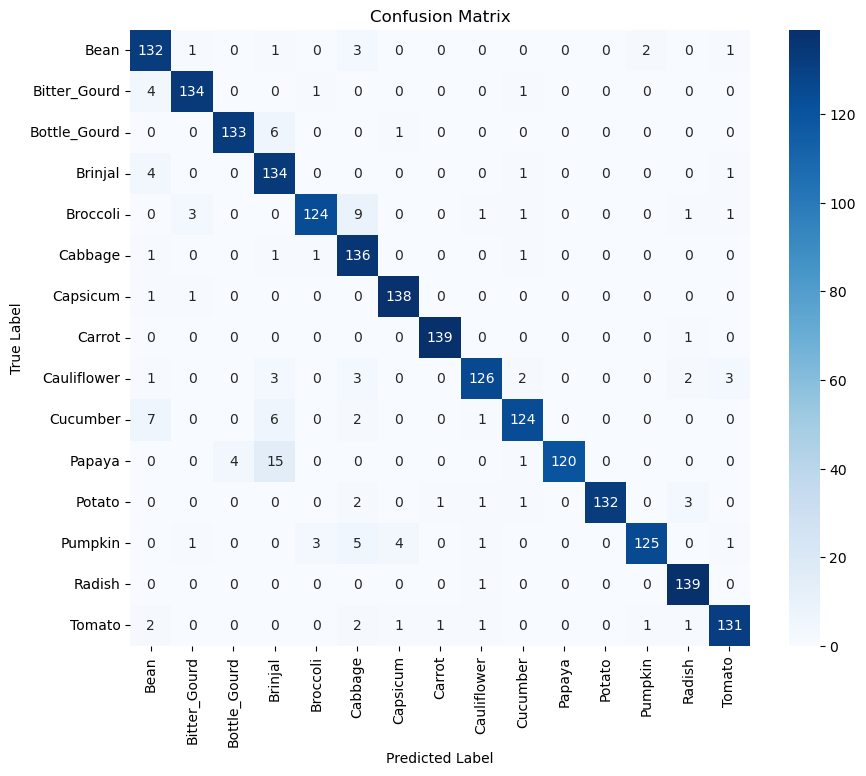

In [ ]:
# 🧾 3. Confusion Matrix
# Prediksi hasil dari test set
Y_pred = model_1.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Label sebenarnya
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Konversi Model

In [ ]:
# Asumsi model hasil training disimpan dalam variabel ini:
model_1
class_names = train_generator.class_indices.keys()

In [ ]:
#🧾 1. Simpan Model sebagai SavedModel

saved_model_dir = "submission/saved_model"
os.makedirs(saved_model_dir, exist_ok=True)

# Simpan model ke format SavedModel (untuk TFLite dan TFJS)
model_1.export(saved_model_dir)

print("✅ Model berhasil disimpan sebagai SavedModel.")

INFO:tensorflow:Assets written to: submission/saved_model\assets


INFO:tensorflow:Assets written to: submission/saved_model\assets


Saved artifact at 'submission/saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_373')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  2024070293328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2024070295056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2024070296016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2024070296592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2024070296400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2024070297360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2024070297168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2024070298128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2024070297936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2024070298896: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ Model berhasil disimpan

In [ ]:
# 2Konversi ke TensorFlow Lite (TFLite)

# Tentukan lokasi model TFLite
tflite_model_dir = "submission/tflite"
os.makedirs(tflite_model_dir, exist_ok=True)

# Konversi model ke format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model_1)
tflite_model = converter.convert()

# Simpan file model.tflite
with open(os.path.join(tflite_model_dir, "model.tflite"), 'wb') as f:
    f.write(tflite_model)
print("✅ Model berhasil dikonversi ke TFLite dan disimpan di:", tflite_model_dir)

# Jika kamu juga membutuhkan label.txt
labels = class_names  # Gantilah dengan nama kelas sesuai dataset kamu
with open(os.path.join(tflite_model_dir, "label.txt"), 'w') as label_file:
    for label in labels:
        label_file.write(f"{label}\n")
print("✅ label.txt telah dibuat.")

INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpij7btkrf\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpij7btkrf\assets


Saved artifact at 'C:\Users\User\AppData\Local\Temp\tmpij7btkrf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_373')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  2024070293328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2024070295056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2024070296016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2024070296592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2024070296400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2024070297360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2024070297168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2024070298128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2024070297936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2024070298896: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ M

In [1]:
from google.colab import files

# Unggah file model_1.keras
uploaded = files.upload()


Saving model_1.keras to model_1.keras


In [3]:
import tensorflow as tf

# Muat model Keras yang telah disimpan
model = tf.keras.models.load_model('model_1.keras')
print("✅ Model berhasil dimuat.")

✅ Model berhasil dimuat.


In [5]:
import tensorflowjs as tfjs

# Tentukan direktori output untuk model TensorFlow.js
tfjs_model_dir = '/content/tfjs_model'

# Buat folder untuk menyimpan model TensorFlow.js jika belum ada
os.makedirs(tfjs_model_dir, exist_ok=True)

# Konversi model Keras ke format TensorFlow.js
tfjs.converters.save_keras_model(model, tfjs_model_dir)


failed to lookup keras version from the file,
    this is likely a weight only file


## Inference (Optional)

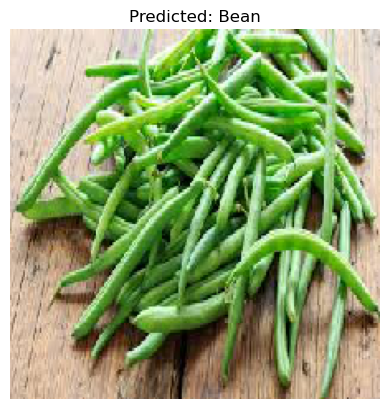


Probabilitas prediksi:
Bean: 0.8607
Bitter_Gourd: 0.1389
Bottle_Gourd: 0.0000
Brinjal: 0.0000
Broccoli: 0.0003
Cabbage: 0.0000
Capsicum: 0.0000
Carrot: 0.0000
Cauliflower: 0.0000
Cucumber: 0.0000
Papaya: 0.0000
Potato: 0.0000
Pumpkin: 0.0000
Radish: 0.0001
Tomato: 0.0000


In [ ]:
# Load SavedModel via TFSMLayer
layer = TFSMLayer('submission/saved_model', call_endpoint='serving_default')
model = Sequential([layer])

# Muat gambar uji
img_path = 'beans.jpg'  # Ganti sesuai nama file gambar uji kamu
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalisasi

# Lakukan prediksi
output = model(img_array)
if isinstance(output, dict):
    output = list(output.values())[0]
predictions = output.numpy()[0]

# Label kelas (15 kelas tanpa duplikat)
class_names = [
    "Bean", "Bitter_Gourd", "Bottle_Gourd", "Brinjal",'Broccoli', "Cabbage",
    "Capsicum", "Carrot", "Cauliflower", "Cucumber", "Papaya",
    "Potato", "Pumpkin", "Radish", "Tomato"
]

# Ambil hasil prediksi
predicted_class = class_names[np.argmax(predictions)]

# Tampilkan gambar dan hasil prediksi
plt.imshow(img)
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')
plt.show()

# Tampilkan semua skor
print("\nProbabilitas prediksi:")
for i, score in enumerate(predictions):
    print(f"{class_names[i]}: {score:.4f}")
